In [4]:
from random import Random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 

plt.style.use('classic')

In [17]:
class inc_ideal:
    def __init__(self):
        self.n = 0
    
    def inc(self):
        self.n += 1
        
    def get(self):
        return self.n

def check(inc, T = 10, N=2**10):
    ii = inc_ideal()
    i_l = []
    im = []
    m_l = []
    err = []
    for s in range(T):
        im.append(inc(s))
        m_l.append([])
        err.append([])
  
    for i in range(N):
            ii.inc()
            i_l.append(ii.get())
            for s in range(T):
                im[s].inc()
                m_l[s].append(im[s].get())
                err[s].append((i_l[-1]-m_l[s][-1])/i_l[-1])
    plt.subplot(211)
    plt.plot(i_l)
    for s in range(T):
        plt.plot(m_l[s])
    plt.subplot(212)
    for s in range(T):
        plt.plot(err[s])
    plt.show()

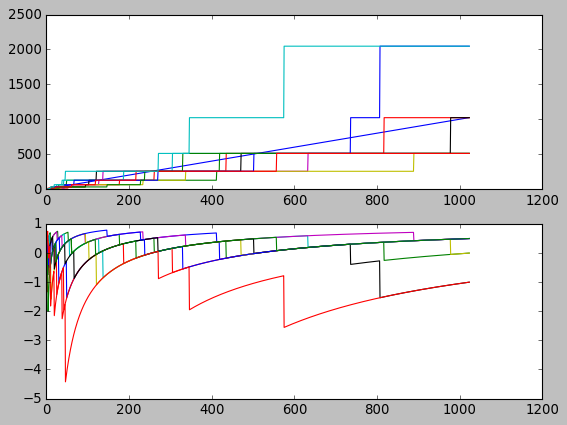

In [18]:
class inc_morris:
    def __init__(self, seed=0):
        self.n = 0
        self.r = Random()
        self.r.seed(seed)
        
    def inc(self):
        if self.n == 0:
            self.n = 1
            return
        x = 0
        for i in range(self.n):
            x += self.r.randrange(2)
        if x == 0:
            self.n += 1            
        
    def get(self):
        return 2**self.n-1

check(inc_morris)

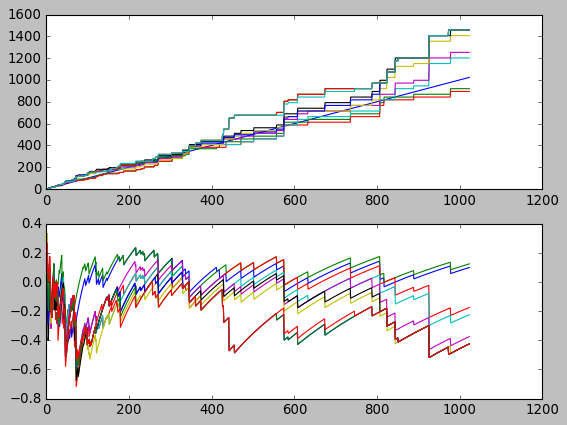

In [19]:
class inc_morris_p:
    def __init__(self, seed=0, t=10):
        self.T = t
        self.m = []
        for t in range(self.T):
            self.m.append(inc_morris(seed+t))

    def inc(self):
        for t in range(self.T):
            self.m[t].inc()
            
    def get(self):
        tmp = 0
        for t in range(self.T):
            tmp += self.m[t].get()
        return tmp/self.T

check(inc_morris_p)